<h1>Linear regression 1D: Training Two Parameter</h1>
- train the model and visualize the loss

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [222]:
class plot_error_surfaces(object):
    def __init__(self, w_range,b_range,X,Y,n_samples=30,go=True):
        W=np.linspace(-w_range, w_range,n_samples)
        B=np.linspace(-b_range,b_range,n_samples)
        w,b=np.meshgrid(W,B)
        Z=np.zeros((30,30))
        count1=0
        self.y=Y.numpy()
        self.x=X.numpy()
        for w1,b1 in zip(w,b):
            count2=0
            for w2,b2 in zip(w1,b1):
                Z[count1,count2]=np.mean((self.y-w2*self.x+b2)**2)
                count2+=1
            count1+=1
        self.Z=Z
        self.w=w
        self.b=b
        self.W=[]
        self.B=[]
        self.LOSS=[]
        self.n=0
        if go==True:
            plt.figure()
            plt.figure(figsize=(7.5,5))
            plt.axes(projection='3d').plot_surface(self.w,self.b,self.Z,rstride=1,cstride=1,cmap='viridis',edgecolor='none')
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w,self.b,self.Z)
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    #setter
    def set_para_loss(self,W,B,loss):
        self.n=self.n+1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    #plot diagram
    def final_plot(self):
        ax=plt.axes(projection='3d')
        ax.plot_wireframe(self.w,self.b,self.Z)
        ax.scatter(self.W,self.B,self.LOSS,c='r',marker='x',s=200,alpha=1)
        plt.figure()
        plt.contour(self.w,self.b,self.Z)
        plt.scatter(self.W,self.B,c='r',marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    #plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x,self.y,'ro',label='training points')
        plt.plot(self.x,self.W[-1]*self.x+self.B[-1],label='estimated line')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10,15))
        plt.title('Data Space Iteration: '+ str(self.n))

        plt.subplot(122)
        plt.contour(self.w,self.b,self.Z)
        plt.scatter(self.W,self.B,c='r',marker='x')
        plt.title('Total Loss Surface Contour Iteration'+str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

# make some Data

In [207]:
import torch

In [208]:
# create f(x) with a slope 1 and bias -1
x=torch.arange(-3,3,0.1).view(-1,1)
f=1*x-1

In [209]:
# adding noise to the data
y=f+0.1*torch.randn(x.size())

In [210]:
y

tensor([[-3.9961],
        [-3.8274],
        [-3.8542],
        [-3.6247],
        [-3.7089],
        [-3.5290],
        [-3.5082],
        [-3.3105],
        [-3.1146],
        [-3.1027],
        [-2.8301],
        [-2.7967],
        [-2.9455],
        [-2.7194],
        [-2.6435],
        [-2.4621],
        [-2.4234],
        [-2.3799],
        [-1.9869],
        [-2.0866],
        [-2.0978],
        [-1.8997],
        [-1.7553],
        [-1.6009],
        [-1.3492],
        [-1.5775],
        [-1.4452],
        [-1.2280],
        [-1.1725],
        [-0.9536],
        [-1.1851],
        [-0.8823],
        [-0.7099],
        [-0.5408],
        [-0.6893],
        [-0.5813],
        [-0.3980],
        [-0.3535],
        [-0.1016],
        [ 0.0214],
        [ 0.1128],
        [ 0.1191],
        [ 0.1918],
        [ 0.2737],
        [ 0.1155],
        [ 0.4685],
        [ 0.4066],
        [ 0.6014],
        [ 0.8454],
        [ 0.8598],
        [ 1.0221],
        [ 1.2048],
        [ 1.

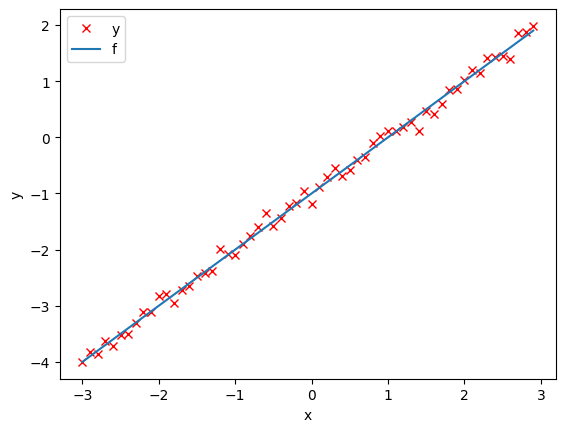

In [211]:
plt.plot(x.numpy(),y.numpy(),'rx',label='y')
plt.plot(x.numpy(),f.numpy(),label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# create the model and cost function (Total Loss)

In [213]:
def forward(x):
    return w*x+b


In [214]:
# MSE
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

<Figure size 640x480 with 0 Axes>

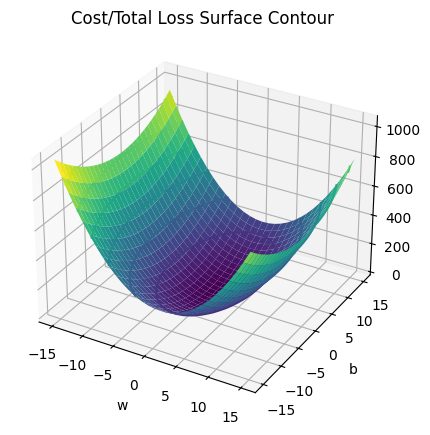

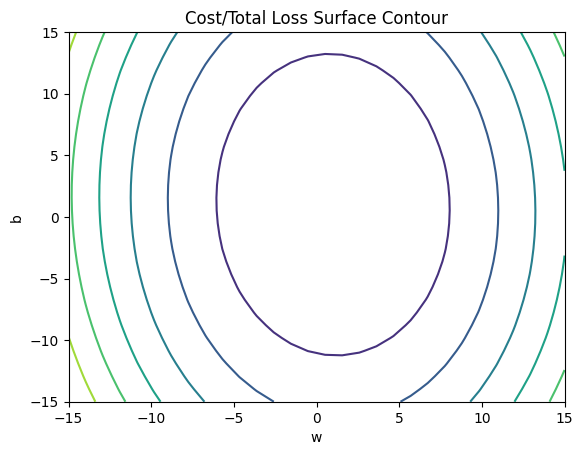

In [226]:
get_surface=plot_error_surfaces(15,15,x,y,30)

In [216]:
# train the model

In [217]:
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)

In [218]:
lr=0.1
LOSS=[]

In [219]:
def train_model(iter):
    for epochs in range(iter):
        yhat=forward(x)
        loss=criterion(yhat,y)
        get_surface.set_para_loss(w.data.tolist(),b.data.tolist(),loss.tolist())
        if epochs%3==0:
            get_surface.plot_ps()
        LOSS.append(loss)
        loss.backward()
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

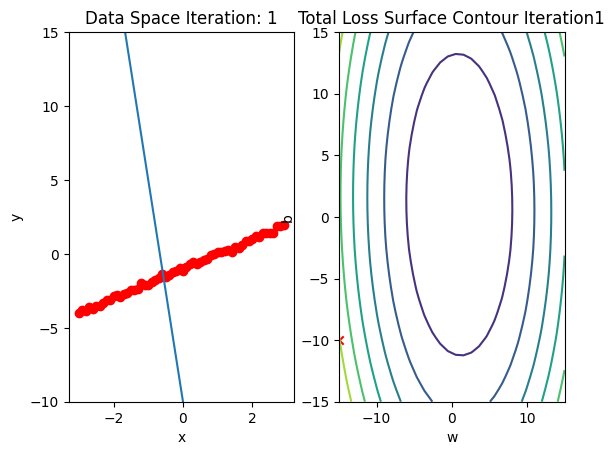

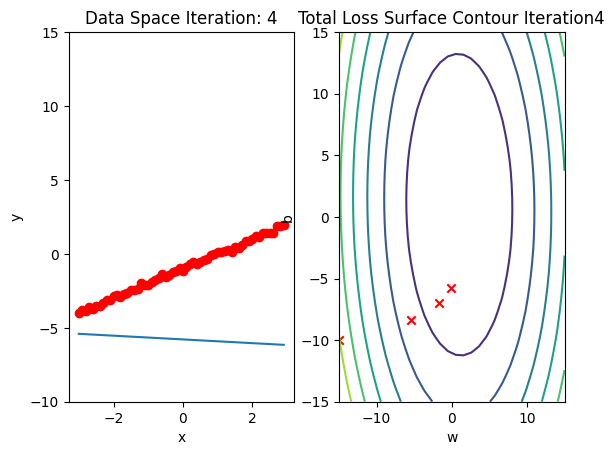

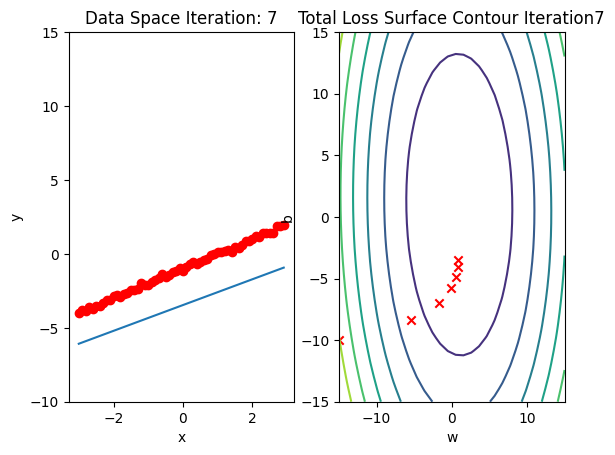

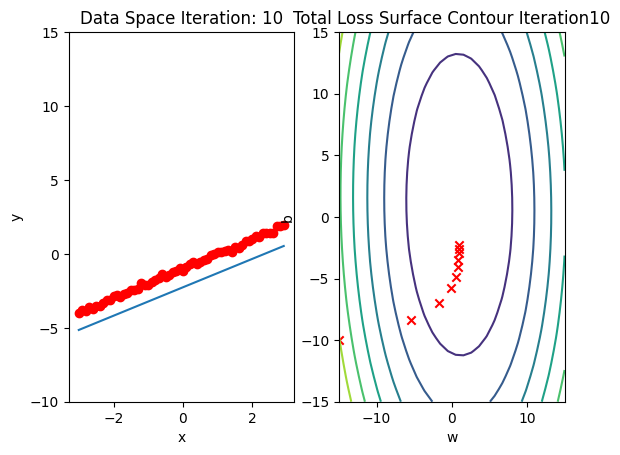

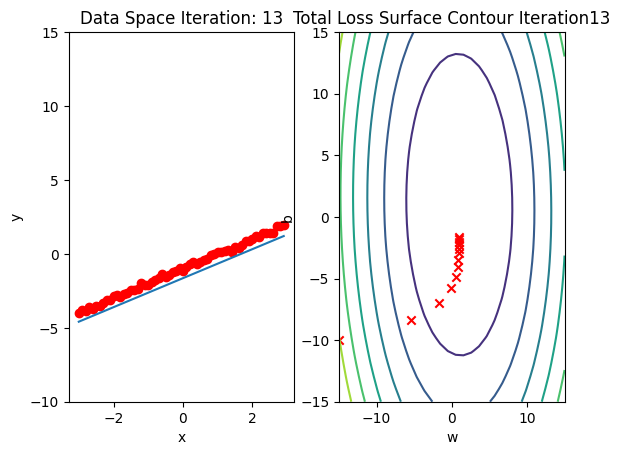

In [220]:
train_model(15)

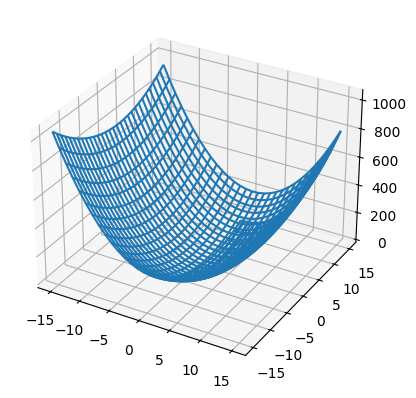

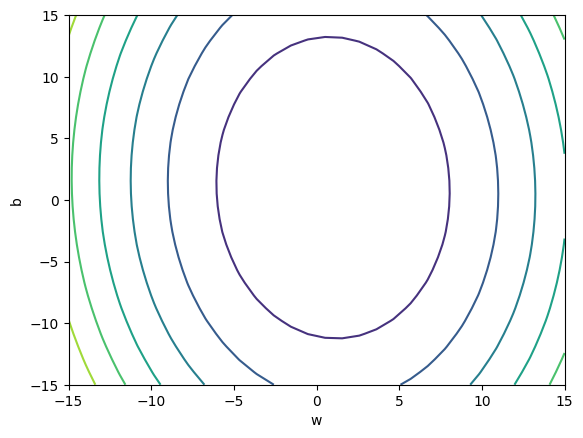

Text(38.347222222222214, 0.5, 'Cost')

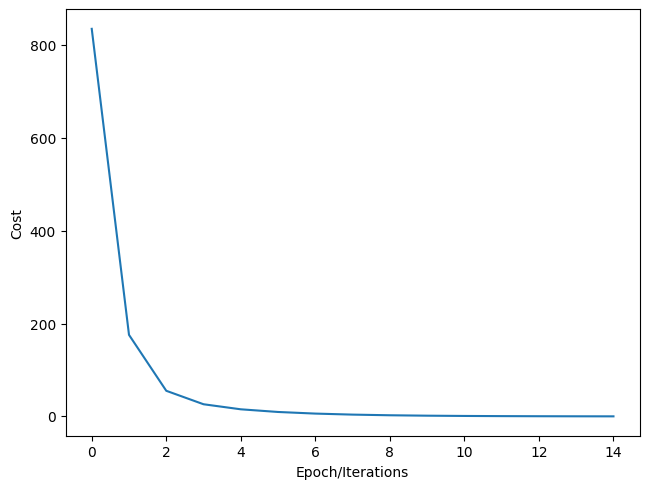

In [228]:
# plot out the loss results 
get_surface.final_plot()
LOSS=[loss.detach().numpy() for loss in LOSS]
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel('Epoch/Iterations')
plt.ylabel('Cost')

In [230]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.2
LOSS2 = []

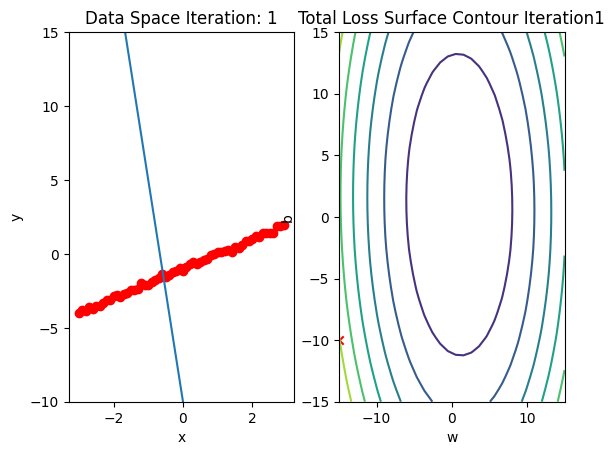

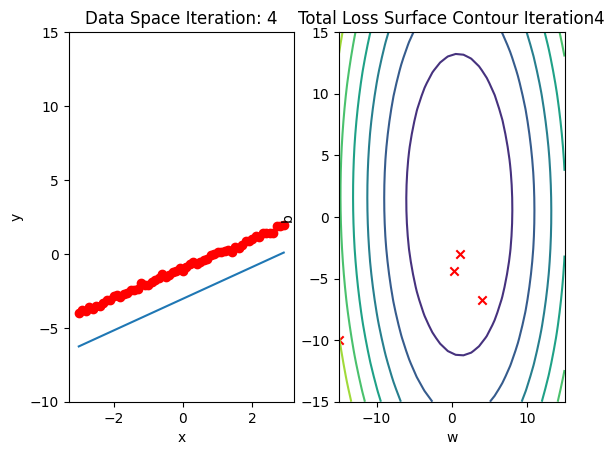

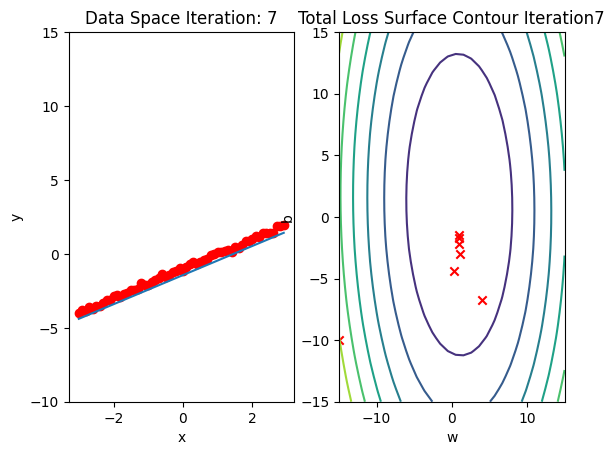

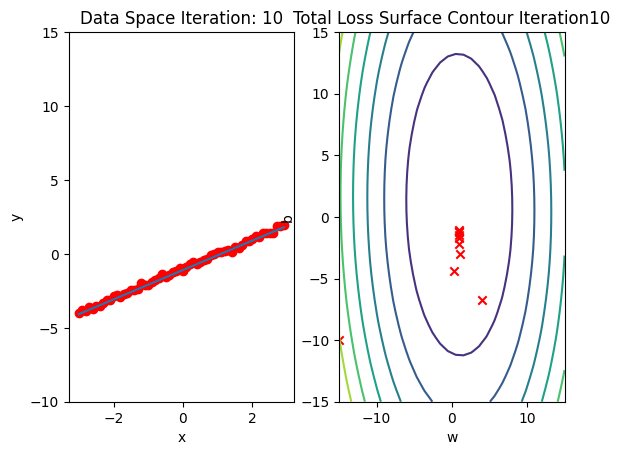

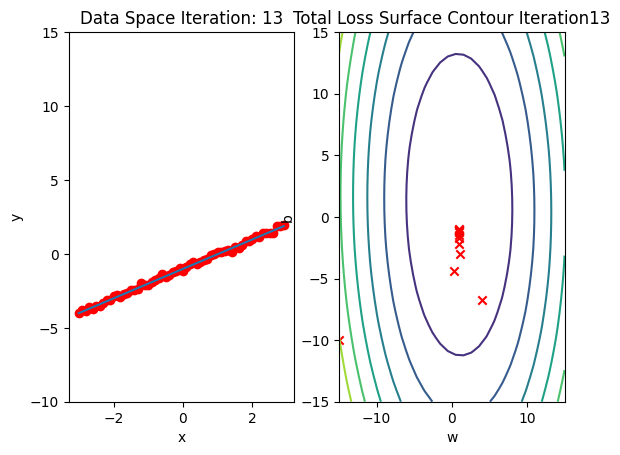

In [236]:
def my_train_model(iter):
    for epoch in range(iter):
        Yhat = forward(x)
        loss = criterion(Yhat, y)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
        LOSS2.append(loss)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
my_train_model(15)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

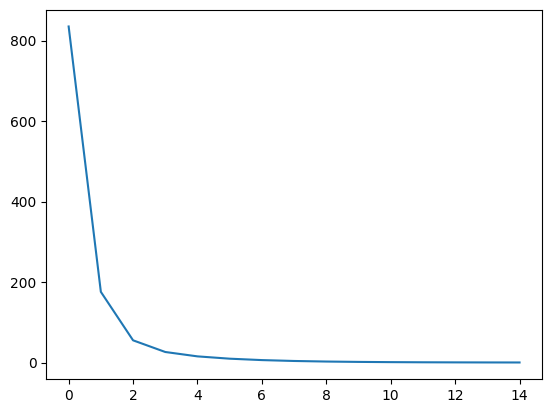

In [254]:
plt.plot(LOSS, label = "LOSS")
plt.plot(LOSS2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()